<a href="https://colab.research.google.com/github/Aravindkumar-Rajendran/EVA/blob/master/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 6s 0us/step


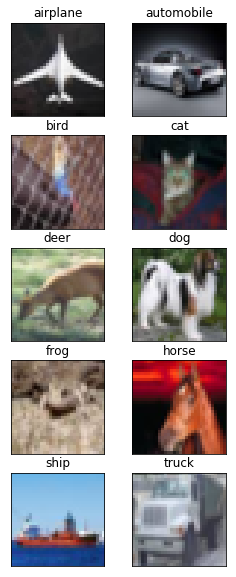

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(4,10))
for i in range(num_classes):
    ax = fig.add_subplot(5, 2, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_77 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 24s 61ms/step - loss: 1.9260 - acc: 0.2560 - val_loss: 1.5271 - val_acc: 0.4364
Epoch 2/100
390/390 [==============================] - 21s 55ms/step - loss: 1.4093 - acc: 0.4855 - val_loss: 1.1644 - val_acc: 0.5735
Epoch 3/100
390/390 [==============================] - 21s 54ms/step - loss: 1.1772 - acc: 0.5800 - val_loss: 0.9945 - val_acc: 0.6452
Epoch 4/100
390/390 [==============================] - 21s 53ms/step - loss: 1.0222 - acc: 0.6440 - val_loss: 0.8761 - val_acc: 0.6913
Epoch 5/100
390/390 [==============================] - 21s 53ms/step - loss: 0.9072 - acc: 0.6859 - val_loss: 0.7885 - val_acc: 0.7290
Epoch 6/100
390/390 [==============================] - 21s 53ms/step - loss: 0.8308 - acc: 0.7151 - val_loss: 0.7561 - val_acc: 0.7444
Epoch 7/100
390/390 [==============================] - 21s 53ms/step - loss: 0.7813 - acc: 0.7320 - val_loss: 0.7189 - val_acc: 0.7555
Epoch 8/100
390/390 [==============================] - 

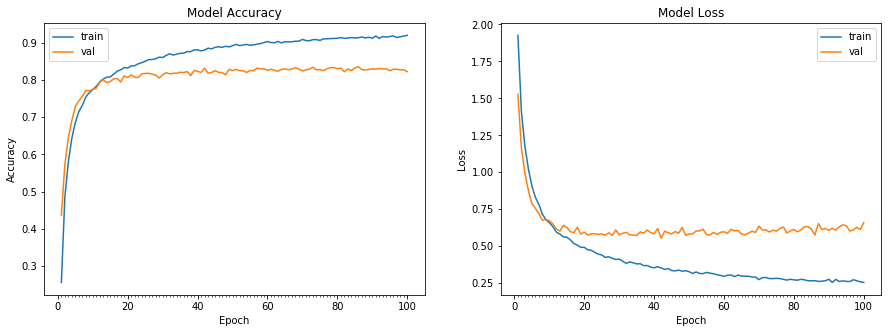

Accuracy on test data is: 82.26


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
num_classes = 10

from keras import layers 
from keras.models import Model
from keras.layers import Input

inputs = Input(shape=(32, 32, 3))
            
#Normal Convolution
inp = layers.Conv2D(32, 3, 3, border_mode='same')(inputs)
act1 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(inp)
drop1 = layers.Dropout(0.1)(act1)
batch1 = layers.BatchNormalization()(drop1)


#Spatially separable convolution
conv_2_1_3 = layers.Conv2D(32, 1, 3 )(batch1)
conv_2_3_1 = layers.Conv2D(32, 3, 1 )(conv_2_1_3)
act2 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_2_3_1)        
drop2 = layers.Dropout(0.1)(act2)
batch2 = layers.BatchNormalization()(drop2)



#Depthwise Separable convolution
conv_3_depth = layers.SeparableConv2D(128, 3, 3)(batch2)
act3 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0) (conv_3_depth)       
drop3 = layers.Dropout(0.1)(act3)
batch3 = layers.BatchNormalization()(drop3)



#First Max pooling layer
conv_max = layers.Conv2D(32, 1, 1)(batch3)
max_1 = layers.MaxPooling2D(pool_size=(2, 2))(conv_max)
batch4 = layers.BatchNormalization()(max_1)


#Grouped convolution without dilation (Group 1)
conv_4_grp1_1 = layers.Conv2D(64, 3, 3, border_mode='same')(batch4)
conv_4_grp1_2 = layers.Conv2D(64, 5, 5, border_mode='same')(conv_4_grp1_1)
act4_grp1 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_4_grp1_2)
drop4_grp1 = layers.Dropout(0.1)(act4_grp1)
batch4_grp1 = layers.BatchNormalization()(drop4_grp1)


#Grouped convolution without dilation (Group 2)                    
conv_4_grp2_1 = layers.Conv2D(64, 3, 3, border_mode='same')(batch4)
conv_4_grp2_2 = layers.Conv2D(64, 5, 5, border_mode='same')(conv_4_grp2_1)
act4_grp2 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_4_grp2_2)
drop4_grp2 = layers.Dropout(0.1)(act4_grp2)
batch4_grp2 = layers.BatchNormalization()(drop4_grp2)


#Concatenating the first grouped convolution
model = layers.concatenate([batch4_grp1, batch4_grp2])


#second max pooling layer
conv_max2 = layers.Conv2D(32, 1, 1)(model)
max_2 = layers.MaxPooling2D(pool_size=(2, 2))(conv_max2)


#Grouped convolution with dilation (Group 1)
conv_5_grp1_1 = layers.Conv2D(64, 3, 3, dilation_rate=1)(max_2)
conv_5_grp1_2 = layers.Conv2D(64, 5, 5, border_mode='same')(conv_5_grp1_1)
act5_grp1 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_5_grp1_2)
drop5_grp1 = layers.Dropout(0.1)(act5_grp1)
batch5_grp1 = layers.BatchNormalization()(drop5_grp1)


#Grouped convolution without dilation (Group 2)
conv_5_grp2_1 = layers.Conv2D(64, 3, 3, dilation_rate=1)(max_2)
conv_5_grp2_2 = layers.Conv2D(64, 5, 5, border_mode='same')(conv_5_grp2_1)
act5_grp2 = layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(conv_5_grp2_2)
drop5_grp2 = layers.Dropout(0.1)(act5_grp2)
batch5_grp2 = layers.BatchNormalization()(drop5_grp2)


#Concatenating the second grouped convolution
model = layers.concatenate([batch5_grp1, batch5_grp2])

#Point-wise layer
point_1 = layers.Conv2D(10, 1, 1)(model)


#Global average pooling layer
gap = layers.GlobalAveragePooling2D()(point_1)

#Softmax output- prediction layer
output = layers.Softmax(axis=-1)(gap)

modl = Model(inputs=inputs, outputs=output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 1))`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(128, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
/usr/lo

In [0]:
modl.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 32, 32, 32)   896         input_8[0][0]                    
__________________________________________________________________________________________________
re_lu_33 (ReLU)                 (None, 32, 32, 32)   0           conv2d_63[0][0]                  
__________________________________________________________________________________________________
dropout_33 (Dropout)            (None, 32, 32, 32)   0           re_lu_33[0][0]                   
__________________________________________________________________________________________________
batch_norm

W0620 08:28:42.541036 140191155767168 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=80)`
  
W0620 08:28:42.724974 140191155767168 deprecation.py:323

Epoch 1/80
390/390 [==============================] - 53s 135ms/step - loss: 1.2470 - acc: 0.5502 - val_loss: 1.1058 - val_acc: 0.6271
Epoch 2/80
390/390 [==============================] - 46s 118ms/step - loss: 0.8623 - acc: 0.6961 - val_loss: 0.9365 - val_acc: 0.6730
Epoch 3/80
390/390 [==============================] - 46s 117ms/step - loss: 0.7233 - acc: 0.7472 - val_loss: 0.8176 - val_acc: 0.7159
Epoch 4/80
390/390 [==============================] - 46s 117ms/step - loss: 0.6421 - acc: 0.7786 - val_loss: 0.9561 - val_acc: 0.6832
Epoch 5/80
390/390 [==============================] - 45s 116ms/step - loss: 0.5846 - acc: 0.7964 - val_loss: 0.7966 - val_acc: 0.7396
Epoch 6/80
390/390 [==============================] - 45s 116ms/step - loss: 0.5257 - acc: 0.8179 - val_loss: 0.7309 - val_acc: 0.7622
Epoch 7/80
390/390 [==============================] - 45s 116ms/step - loss: 0.4864 - acc: 0.8298 - val_loss: 0.6436 - val_acc: 0.7800
Epoch 8/80
390/390 [==============================] - 4

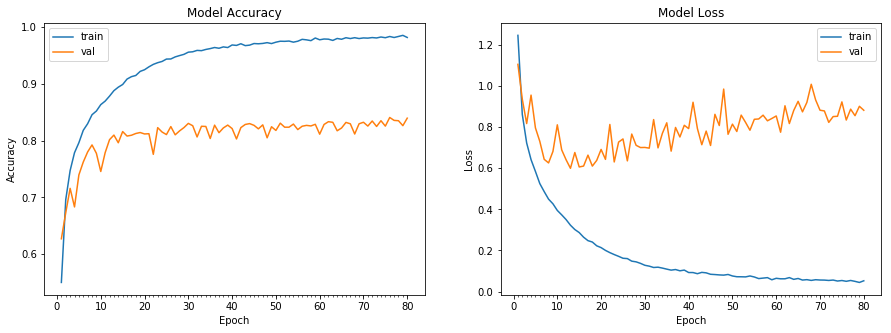

Accuracy on test data is: 83.95


In [0]:
# Compile the model
modl.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
modl_info = modl.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 80, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(modl_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, modl))